## imports

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
import sys 
import os
sys.path.append(os.path.abspath("../src"))

import functions as fnc

In [32]:
data = pd.read_csv('../data/processed/train.csv')
test_data = pd.read_csv('../data/processed/test.csv')

In [3]:
columns_for_modelling = ['Pclass',
                         'Sex',
 'SibSp',
 'Parch',
 'Embarked',
 'J_missing_age',
 'Age',
 'Fare',
 'J_title_grouped',
 'J_nrelatives',
 'J_ticket_prefix',
 'J_ticket_location',
 'J_cabin_letter',
 'J_n_siblings_spouses']

## ordinal encoder

In [33]:
from sklearn.preprocessing import OrdinalEncoder

# Create encoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',
                                 unknown_value=-1)

In [34]:
data['Sex'] = ordinal_encoder.fit_transform(data['Sex'].values.reshape(-1, 1))
test_data['Sex'] = ordinal_encoder.transform(test_data['Sex'].values.reshape(-1, 1))

data['Embarked'] = ordinal_encoder.fit_transform(data['Embarked'].values.reshape(-1, 1))
test_data['Embarked'] = ordinal_encoder.transform(test_data['Embarked'].values.reshape(-1, 1))

data['J_title_grouped'] = ordinal_encoder.fit_transform(data['J_title_grouped'].values.reshape(-1, 1))
test_data['J_title_grouped'] = ordinal_encoder.transform(test_data['J_title_grouped'].values.reshape(-1, 1))

data['J_ticket_prefix'] = ordinal_encoder.fit_transform(data['J_ticket_prefix'].values.reshape(-1, 1))
test_data['J_ticket_prefix'] = ordinal_encoder.transform(test_data['J_ticket_prefix'].values.reshape(-1, 1))

data['J_ticket_location'] = ordinal_encoder.fit_transform(data['J_ticket_location'].values.reshape(-1, 1))
test_data['J_ticket_location'] = ordinal_encoder.transform(test_data['J_ticket_location'].values.reshape(-1, 1))

data['J_cabin_letter'] = ordinal_encoder.fit_transform(data['J_cabin_letter'].values.reshape(-1, 1))
test_data['J_cabin_letter'] = ordinal_encoder.transform(test_data['J_cabin_letter'].values.reshape(-1, 1))


## train test split

In [6]:
df_train_train, df_train_test= train_test_split(data, test_size = 0.3, random_state = 656)

In [7]:
df_train_train.shape, df_train_test.shape

((623, 24), (268, 24))

In [8]:
df_train_train['Survived'].value_counts(dropna= False)

0    394
1    229
Name: Survived, dtype: int64

## training

In [ ]:
XGBClassifier()

In [9]:
clf = XGBClassifier(n_estimators = 500,
                   max_depth = 3, 
                   learning_rate = 0.05,
                   gamma = 1 ,
                   reg_alpha= 0,
                   reg_lambda = 1,
                   scale_pos_weight = df_train_train[df_train_train['Survived']==1].shape[0]/df_train_train[df_train_train['Survived']==0].shape[0],
                   random_state = 123,
                   colsample_bytree = 0.8,
                    objective="binary:logistic",
                   eval_metric = 'auc')

In [10]:
clf.fit(df_train_train[columns_for_modelling], 
        df_train_train['Survived'], 
        eval_set = [(df_train_test[columns_for_modelling], df_train_test['Survived'])],
        early_stopping_rounds = 20)

[0]	validation_0-auc:0.83349
[1]	validation_0-auc:0.84282
[2]	validation_0-auc:0.85398
[3]	validation_0-auc:0.85498
[4]	validation_0-auc:0.85826
[5]	validation_0-auc:0.86335
[6]	validation_0-auc:0.85995
[7]	validation_0-auc:0.85749
[8]	validation_0-auc:0.86023
[9]	validation_0-auc:0.86069
[10]	validation_0-auc:0.86138
[11]	validation_0-auc:0.86183
[12]	validation_0-auc:0.86041
[13]	validation_0-auc:0.86126
[14]	validation_0-auc:0.86149


/Users/jack/anaconda3/envs/titanic_venv/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86280
[16]	validation_0-auc:0.86360
[17]	validation_0-auc:0.86395
[18]	validation_0-auc:0.86389
[19]	validation_0-auc:0.86366
[20]	validation_0-auc:0.86474
[21]	validation_0-auc:0.86463
[22]	validation_0-auc:0.86452
[23]	validation_0-auc:0.86409
[24]	validation_0-auc:0.86075
[25]	validation_0-auc:0.86120
[26]	validation_0-auc:0.86109
[27]	validation_0-auc:0.86160
[28]	validation_0-auc:0.86183
[29]	validation_0-auc:0.86183
[30]	validation_0-auc:0.86178
[31]	validation_0-auc:0.85864
[32]	validation_0-auc:0.86003
[33]	validation_0-auc:0.85941
[34]	validation_0-auc:0.85946
[35]	validation_0-auc:0.85969
[36]	validation_0-auc:0.86021
[37]	validation_0-auc:0.86026
[38]	validation_0-auc:0.86072
[39]	validation_0-auc:0.86032
[40]	validation_0-auc:0.86015


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

## results

In [11]:
results = {'train': roc_auc_score(df_train_train['Survived'],clf.predict_proba(df_train_train[columns_for_modelling])[:,1]),
          'val': roc_auc_score(df_train_test['Survived'],clf.predict_proba(df_train_test[columns_for_modelling])[:,1])}

In [12]:
results['train']

0.8899929067009511

In [13]:
data['clf_score'] = clf.predict_proba(data[columns_for_modelling])[:,1]
data['train_val'] = 'train'
data.loc[data['PassengerId'].isin(df_train_test['PassengerId'].to_list()),'train_val'] = 'val'

### roc curve

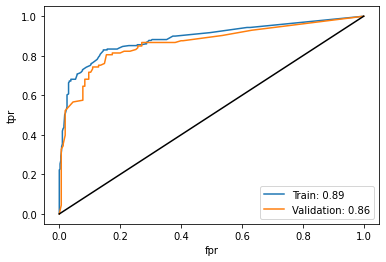

In [14]:
fpr,tpr,thresh = roc_curve(df_train_train['Survived'],clf.predict_proba(df_train_train[columns_for_modelling])[:,1])
plt.plot(fpr, tpr, label='Train: {}'.format(results['train'].round(2))) 
fpr,tpr,thresh = roc_curve(df_train_test['Survived'],clf.predict_proba(df_train_test[columns_for_modelling])[:,1])
plt.plot(fpr, tpr, label = 'Validation: {}'.format(results['val'].round(2))) 
plt.plot([0,1], [0,1], color='black')
plt.legend();
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.show()

### making scorebands

In [15]:
def get_scoreband_Summary(df, target, score_col, n_scorebands):
    df['scoreband'] = pd.qcut(df[score_col], n_scorebands, duplicates='drop')
    
    res = df.groupby('scoreband')[target].value_counts().unstack()
    res = res.fillna(0)
    res['Survival Rate'] = 100*res.loc[:,1]/(res.loc[:,1]+res.loc[:,0])
    return res

In [16]:
get_scoreband_Summary(data[data['train_val']=='train'] , 'Survived', 'clf_score', 10).round(2)

/var/folders/6f/qt7yx3mj0cb712hd40l3ggnr0000gn/T/ipykernel_1171/309134982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scoreband'] = pd.qcut(df[score_col], n_scorebands, duplicates='drop')


Survived,0,1,Survival Rate
scoreband,,,
"(0.2142, 0.2186]",199,19,8.72
"(0.2186, 0.2187]",45,4,8.16
"(0.2187, 0.2587]",37,9,19.57
"(0.2587, 0.3722]",56,7,11.11
"(0.3722, 0.4115]",34,28,45.16
"(0.4115, 0.5838]",15,45,75.00
"(0.5838, 0.7344]",7,59,89.39
"(0.7344, 0.7723]",1,58,98.31


### score distributions

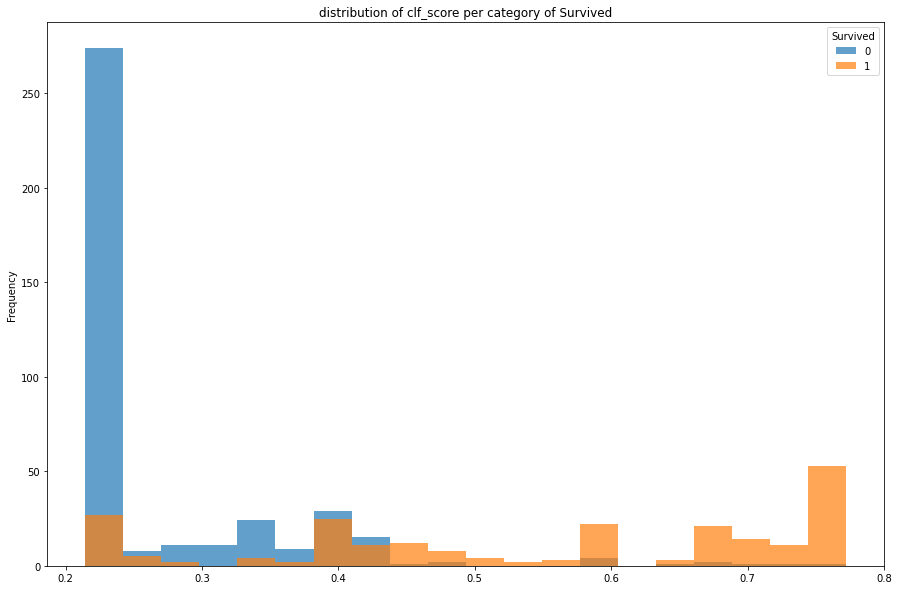

In [17]:
fnc.plot_distro_per_cat(data[data['train_val']=='train'], 'clf_score', 'Survived', plt_args = {'alpha': 0.7, 'bins': 20})

### shap values

In [18]:
import shap

In [19]:
explainer = shap.Explainer(clf)

In [20]:
shap_train = explainer(df_train_train[columns_for_modelling])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


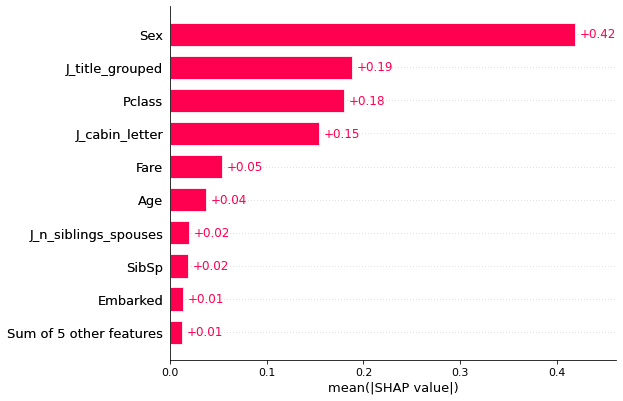

In [21]:
shap.plots.bar(shap_train)

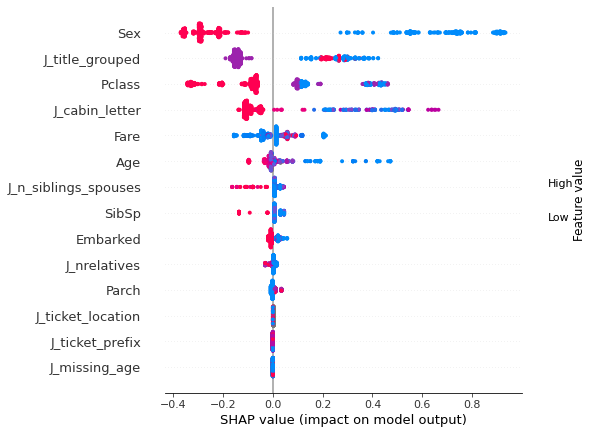

In [22]:
shap.summary_plot(shap_train)

### pdp

In [23]:
from sklearn.inspection import PartialDependenceDisplay

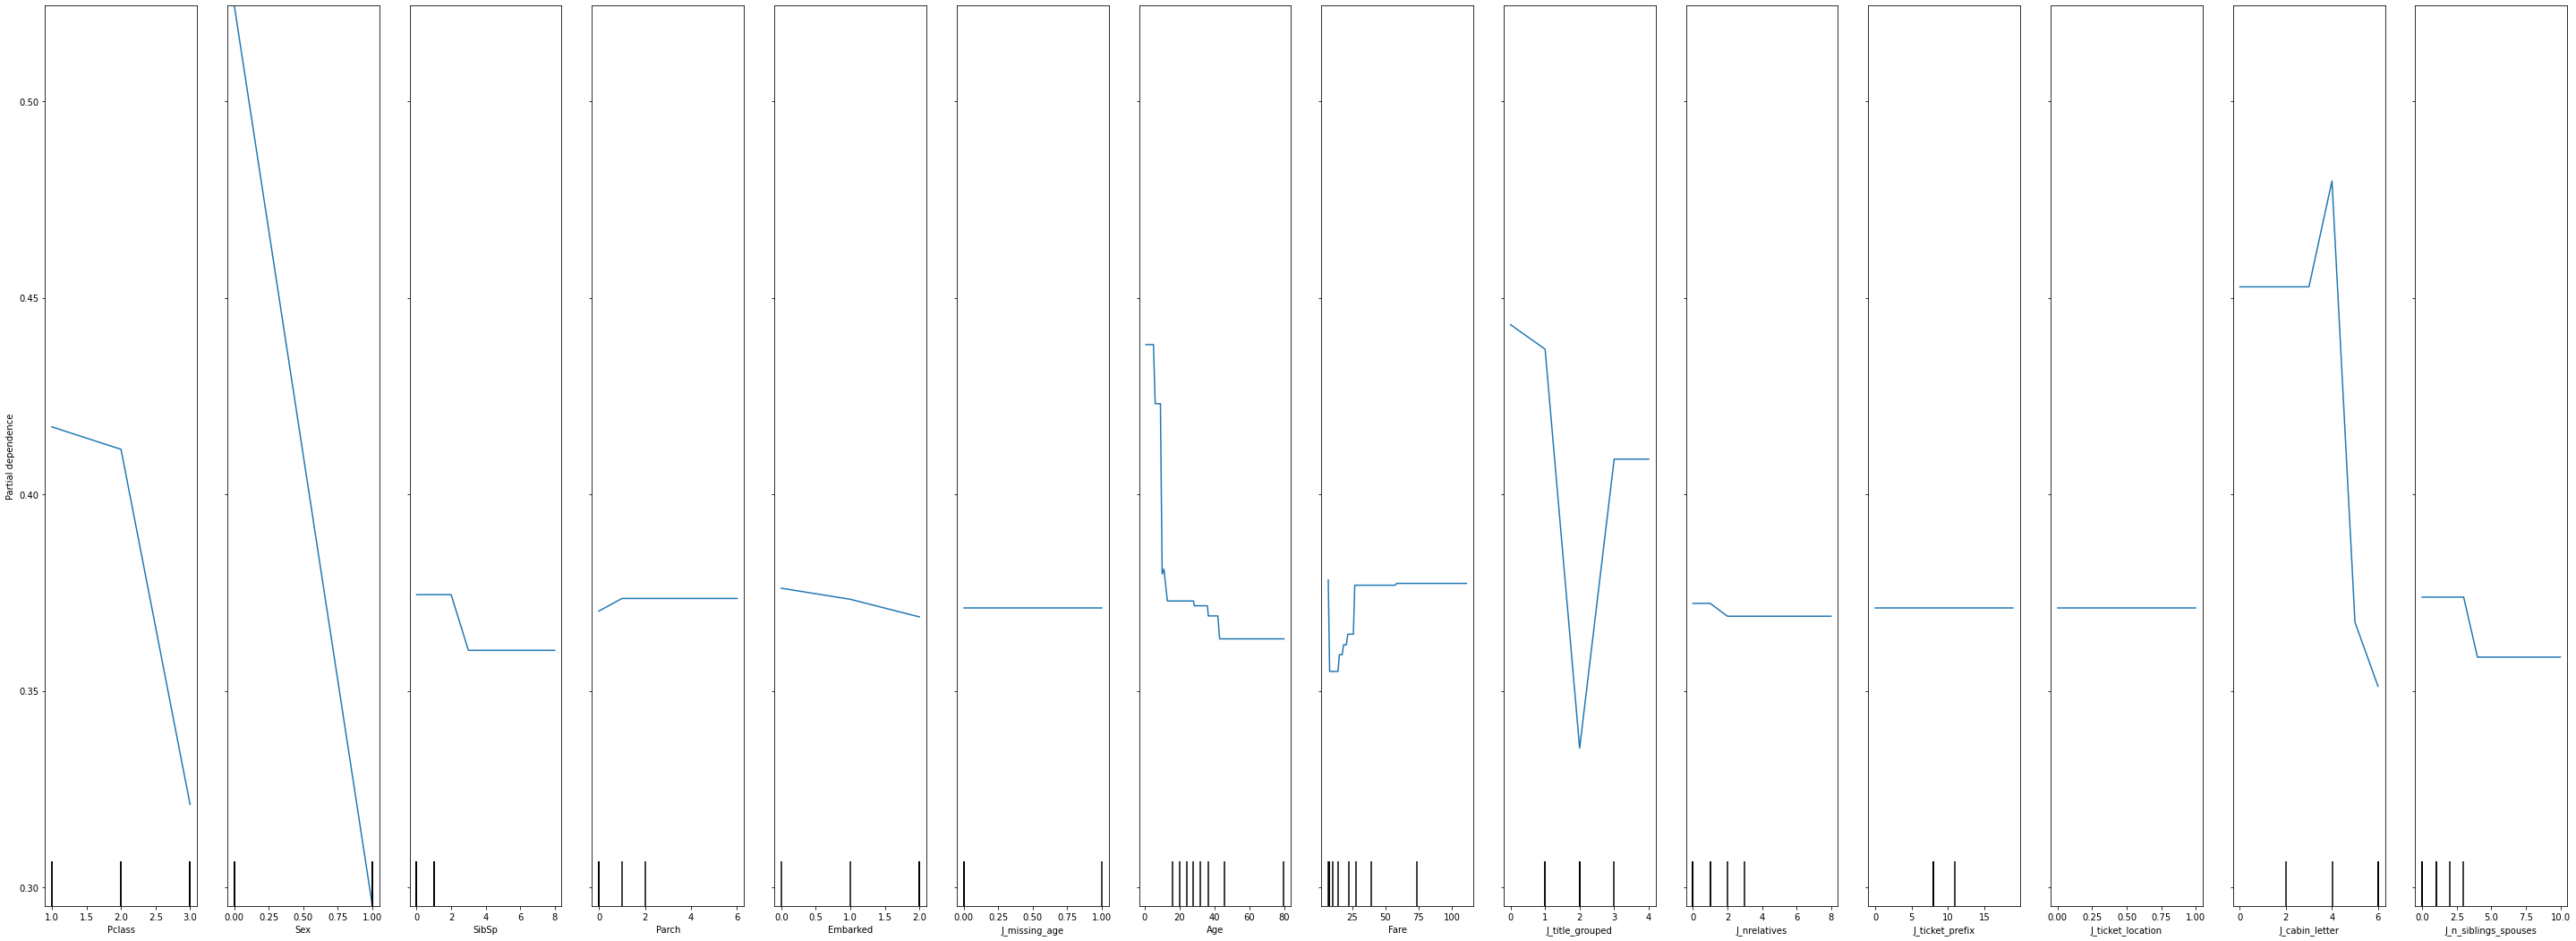

In [24]:
PartialDependenceDisplay.from_estimator(clf, 
                                        df_train_train[columns_for_modelling], 
                                        columns_for_modelling, grid_resolution = 100,n_cols=100 )
fig = plt.gcf();
fig.set_size_inches(50.5, 18.5);
plt.show()

In [25]:
# shap values
# pdp
# hyperparam tune
# cross val
# compare what someone with low and high score looks like

## test results

In [43]:
# lets just take the default threshold for now
res = pd.DataFrame({'PassengerId': test_data['PassengerId'].to_list(),
                    'Survived': clf.predict(test_data[columns_for_modelling])}, 
                                            index=test_data['PassengerId'])

In [45]:
res.to_csv('../data/processed/predictions_test.csv', index=False)

## export model

In [48]:
import pickle
if not os.path.exists('../data/model/'):
    os.mkdir('../data/model')
    
with open('../data/model/eg_xgb_clf.pickle', 'wb') as f:
    pickle.dump(clf, f)